## Amazon Data Curation Project

*Amazon is a popular e-commerce platform where books are sold. The aim of the project is to unravel what type of books were bought frequently, between 2009 and 2019. i will be juxtaposing between the number of books displayed for sale, and the type of books bought frequently by consumers.*

In [2]:
#import packages
import pandas as pd
import numpy as np
import csv
from bs4 import BeautifulSoup
import requests
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException, WebDriverException
import time
from selenium.webdriver.common.keys import Keys
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

#setting up my webscraper
driver = webdriver.Chrome("C:/Users/fatkayd/Downloads/chromedriver.exe")



C:\Users\fatkayd\AppData\Local\Temp\ipykernel_13304\2195328477.py:20: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("C:/Users/fatkayd/Downloads/chromedriver.exe")


In [3]:
def get_data(url):
    
    driver.get(url)
    # try:
    #     element = WebDriverWait(driver, 5).until(
    #         EC.presence_of_element_located((By.ID, "mySuperId"))
    #     )
    # finally:
    
    #     driver.quit()
    
    time.sleep(4)#delay to allow website to load
    
    #code to imitate human scrolling of the website
    driver.find_element(by=By.TAG_NAME, value="body").send_keys(Keys.PAGE_DOWN)
    driver.find_element(by=By.TAG_NAME, value="body").send_keys(Keys.PAGE_DOWN)
    driver.find_element(by=By.TAG_NAME, value="body").send_keys(Keys.PAGE_DOWN)
    driver.find_element(by=By.TAG_NAME, value="body").send_keys(Keys.PAGE_DOWN)
    time.sleep(2)
    driver.find_element(by=By.TAG_NAME, value="body").send_keys(Keys.PAGE_DOWN)
    driver.find_element(by=By.TAG_NAME, value="body").send_keys(Keys.PAGE_DOWN)
    driver.find_element(by=By.TAG_NAME, value="body").send_keys(Keys.PAGE_DOWN)
    driver.find_element(by=By.TAG_NAME, value="body").send_keys(Keys.PAGE_DOWN)
    time.sleep(2)
    driver.find_element(by=By.TAG_NAME, value="body").send_keys(Keys.PAGE_DOWN)
    driver.find_element(by=By.TAG_NAME, value="body").send_keys(Keys.PAGE_DOWN)
    driver.find_element(by=By.TAG_NAME, value="body").send_keys(Keys.PAGE_DOWN)
    driver.find_element(by=By.TAG_NAME, value="body").send_keys(Keys.PAGE_DOWN)
    time.sleep(4)
    
    soup = BeautifulSoup(driver.page_source, 'html.parser')#use bs4 to parse the web content to get the required info
    
     # prints the title of page
    print("First Page = " + driver.title)
    
#     return soup
    
# def get_nxt(url):
    
#     driver.get(url)
    
    # try:
    #     element = WebDriverWait(driver, 5).until(
    #         EC.presence_of_element_located((By.ID, "mySuperId"))
    #     )
    # finally:
    #     driver.quit()
    try:
        WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.CLASS_NAME, 'a-last')))
    finally:
        link = driver.find_element(By.XPATH, "//li[@class='a-last']")
        
        time.sleep(3)

        link.click()#moves to a new page
   
    
    time.sleep(5)#time delay to allow website to load
    
    #imitate human scrolling through the website to allow some features to load
    driver.find_element(by=By.TAG_NAME, value="body").send_keys(Keys.PAGE_DOWN)
    driver.find_element(by=By.TAG_NAME, value="body").send_keys(Keys.PAGE_DOWN)
    driver.find_element(by=By.TAG_NAME, value="body").send_keys(Keys.PAGE_DOWN)
    driver.find_element(by=By.TAG_NAME, value="body").send_keys(Keys.PAGE_DOWN)
    time.sleep(1.5)
    driver.find_element(by=By.TAG_NAME, value="body").send_keys(Keys.PAGE_DOWN)
    driver.find_element(by=By.TAG_NAME, value="body").send_keys(Keys.PAGE_DOWN)
    driver.find_element(by=By.TAG_NAME, value="body").send_keys(Keys.PAGE_DOWN)
    driver.find_element(by=By.TAG_NAME, value="body").send_keys(Keys.PAGE_DOWN)
    time.sleep(1.5)
    driver.find_element(by=By.TAG_NAME, value="body").send_keys(Keys.PAGE_DOWN)
    driver.find_element(by=By.TAG_NAME, value="body").send_keys(Keys.PAGE_UP)
    driver.find_element(by=By.TAG_NAME, value="body").send_keys(Keys.PAGE_DOWN)
    driver.find_element(by=By.TAG_NAME, value="body").send_keys(Keys.PAGE_DOWN)
    driver.find_element(by=By.TAG_NAME, value="body").send_keys(Keys.PAGE_DOWN)
    
    time.sleep(5)
    
#     try:
#         WebDriverWait(driver, 10).until(
#             EC.text_to_be_present_in_element((By.CLASS_NAME, "zg-bdg-text"), "#99"))
#     finally:
    soup2 = BeautifulSoup(driver.page_source, 'html.parser')#use bs4 to parse the web content to get the required info
    
    # prints the title of the second window
    print("Second Page(item) = " + driver.title)
    
    return soup, soup2

    

In [5]:
def scraper(soup):
    books = soup.find_all(id = 'gridItemRoot')#finds the house for all items
    general_book_info = []
    #gets the rank
    for book in books:
        try:
            rank = book.find('span', class_='zg-bdg-text').text
        except Exception as e:
            rank = None

            #gets the title
        try:
            title = book.find('div', '_cDEzb_p13n-sc-css-line-clamp-1_1Fn1y').text
        except Exception as e:
            title = None

            #gets the author name
        try:
            book_author = book.find('a',"a-size-small a-link-child").text
            #print(new[i].text)
        except Exception as e:
            try:
                err = book.find('span', 'a-size-small a-color-base')
                book_author = err.find('div',"_cDEzb_p13n-sc-css-line-clamp-1_1Fn1y").text#Jacqueline Kennedy
            except Exception as e:
                book_author = None


            #gets the number of reviews
        try:

            test = book.find('div', 'a-icon-row')
            reviews = test.find('span',class_="a-size-small").text
                #print(new[i].text)
        except Exception as e:
            reviews = None
            #gets the rating of each book
        try:
            rating = book.find('span',"a-icon-alt").text
                #print(new[i].text)
        except Exception as e:
            rating = None

        try:
            price = book.find('span',"_cDEzb_p13n-sc-price_3mJ9Z").text
            
                #print(new[i].text)
        except Exception as e:
            try:
                price = book.find('span',"p13n-sc-price").text#$0.69
            except Exception as e:
                price = None
            
        try:
            cover_type = book.find('span',"a-size-small a-color-secondary a-text-normal").text
            
                #print(new[i].text)
        except Exception as e:
            cover_type = None
            
        book_info = [title,book_author,price,rating,reviews,rank,cover_type]
        
        general_book_info.append(book_info)
        
    return general_book_info
        
    """with open('fatai.csv', 'w', newline='', encoding='utf-8') as f:
            writer = csv.writer(f)
            writer.writerow(['Title', 'Author', 'Price', 'Rating', 'Reviews', 'Rank', 'Cover'])
            writer.writerows(book_info)"""

    

In [6]:
url = "https://www.amazon.com/gp/bestsellers/2012/books/ref=zg_bsar_cal_ye"

def get_year_books(url,year):
    t = get_data(url) 
    page1 = t[0]
    page2 = t[1]

    bk_inf_1 = scraper(page1)
    bk_inf_2 = scraper(page2)
    title_= []
    author_ = []
    prices = []
    rates = []
    revs = []
    ranks = []
    covs  = []
    for i in bk_inf_1:
        title = i[0]
        title_.append(title)
        author = i[1]
        author_.append(author)
        price = i[2]
        prices.append(price)
        rate = i[3]
        rates.append(rate)
        reviews = i[4]
        revs.append(reviews)
        rank = i[5]
        ranks.append(rank)
        cover = i[6]
        covs.append(cover)
    
    for i in bk_inf_2:
        title = i[0]
        title_.append(title)
        author = i[1]
        author_.append(author)
        price = i[2]
        prices.append(price)
        rate = i[3]
        rates.append(rate)
        reviews = i[4]
        revs.append(reviews)
        rank = i[5]
        ranks.append(rank)
        cover = i[6]
        covs.append(cover)
        
    print(f"Creating dataframe for year {year}...............")
    master = pd.DataFrame({'rank' : ranks, 'book_title' : title_, 'book_author' : author_,
                                'reviews' : revs, 'rating' : rates, 'price' : prices, 'cover_type': covs})
    master["Year"] = year
    
    return master
    
    
    
    

In [7]:
#testing my scraper function
df_2012 = get_year_books(url, 2012)

First Page = Amazon.com Best Sellers of 2012 in Books
Second Page(item) = Amazon.com Best Sellers of 2012 in Books
Creating dataframe for year 2012...............


In [9]:
#scrapes top 100 books for 2009
url = 'https://www.amazon.com/gp/bestsellers/2009/books/ref=zg_bsar_cal_ye'
df_2009 = get_year_books(url, 2009)

First Page = Amazon.com Best Sellers of 2009 in Books
Second Page(item) = Amazon.com Best Sellers of 2009 in Books
Creating dataframe for year 2009...............


In [10]:
#scrapes top 100 books for 2010
url = 'https://www.amazon.com/gp/bestsellers/2010/books/ref=zg_bsar_cal_ye'
df_2010 = get_year_books(url, 2010)

First Page = Amazon.com Best Sellers of 2010 in Books
Second Page(item) = Amazon.com Best Sellers of 2010 in Books
Creating dataframe for year 2010...............


In [11]:
#scrapes top 100 books for 2011
url = 'https://www.amazon.com/gp/bestsellers/2011/books/ref=zg_bsar_cal_ye'
df_2011 = get_year_books(url, 2011)

First Page = Amazon.com Best Sellers of 2011 in Books
Second Page(item) = Amazon.com Best Sellers of 2011 in Books
Creating dataframe for year 2011...............


In [12]:
#scrapes top 100 books for 2013
url = 'https://www.amazon.com/gp/bestsellers/2013/books/ref=zg_bsar_cal_ye'
df_2013 = get_year_books(url, 2013)

First Page = Amazon.com Best Sellers of 2013 in Books
Second Page(item) = Amazon.com Best Sellers of 2013 in Books
Creating dataframe for year 2013...............


In [13]:
#scrapes top 100 books for 2014
url = 'https://www.amazon.com/gp/bestsellers/2014/books/ref=zg_bsar_cal_ye'
df_2014 = get_year_books(url, 2014)

First Page = Amazon.com Best Sellers of 2014 in Books
Second Page(item) = Amazon.com Best Sellers of 2014 in Books
Creating dataframe for year 2014...............


In [14]:
#scrapes top 100 books for 2015
url = 'https://www.amazon.com/gp/bestsellers/2015/books/ref=zg_bsar_cal_ye'
df_2015 = get_year_books(url, 2015)

First Page = Amazon.com Best Sellers of 2015 in Books
Second Page(item) = Amazon.com Best Sellers of 2015 in Books
Creating dataframe for year 2015...............


In [15]:
#scrapes top 100 books for 2016
url = 'https://www.amazon.com/gp/bestsellers/2016/books/ref=zg_bsar_cal_ye'
df_2016 = get_year_books(url, 2016)

First Page = Amazon.com Best Sellers of 2016 in Books
Second Page(item) = Amazon.com Best Sellers of 2016 in Books
Creating dataframe for year 2016...............


In [16]:
#scrapes top 100 books for 2017
url = 'https://www.amazon.com/gp/bestsellers/2017/books/ref=zg_bsar_cal_ye'
df_2017 = get_year_books(url, 2017)

First Page = Amazon.com Best Sellers of 2017 in Books
Second Page(item) = Amazon.com Best Sellers of 2017 in Books
Creating dataframe for year 2017...............


In [17]:
#scrapes top 100 books for 2018
url = 'https://www.amazon.com/gp/bestsellers/2018/books/ref=zg_bsar_cal_ye'
df_2018 = get_year_books(url, 2018)

First Page = Amazon.com Best Sellers of 2018 in Books
Second Page(item) = Amazon.com Best Sellers of 2018 in Books
Creating dataframe for year 2018...............


In [18]:
#scrapes top 100 books for 2019
url = 'https://www.amazon.com/gp/bestsellers/2019/books/ref=zg_bsar_cal_ye'
df_2019 = get_year_books(url, 2019)

First Page = Amazon.com Best Sellers of 2019 in Books
Second Page(item) = Amazon.com Best Sellers of 2019 in Books
Creating dataframe for year 2019...............


In [19]:
#scrapes top 100 books for 2020
url = 'https://www.amazon.com/gp/bestsellers/2020/books/ref=zg_bsar_cal_ye'
df_2020 = get_year_books(url, 2020)

First Page = Amazon.com Best Sellers of 2020 in Books
Second Page(item) = Amazon.com Best Sellers of 2020 in Books
Creating dataframe for year 2020...............


In [20]:
#scrapes top 100 books for 2021
url = 'https://www.amazon.com/gp/bestsellers/2021/books/ref=zg_bsar_cal_ye'
df_2021 = get_year_books(url, 2021)

First Page = Amazon.com Best Sellers of 2021 in Books
Second Page(item) = Amazon.com Best Sellers of 2021 in Books
Creating dataframe for year 2021...............


In [21]:
#scrapes top 100 books for 2022
url = 'https://www.amazon.com/gp/bestsellers/2022/books/ref=zg_bsar_cal_ye'
df_2022 = get_year_books(url, 2022)

First Page = Amazon.com Best Sellers of 2022 in Books
Second Page(item) = Amazon.com Best Sellers of 2022 in Books
Creating dataframe for year 2022...............


In [22]:
df_2009

,rank,book_title,book_author,reviews,rating,price,cover_type,Year
0,#1,The Lost Symbol,Dan Brown,"16,345",4.4 out of 5 stars,$14.96,Hardcover,2009
1,#2,The Shack: Where Tragedy Confronts Eternity,William P. Young,"23,477",4.7 out of 5 stars,$10.43,Paperback,2009
2,#3,Liberty and Tyranny: A Conservative Manifesto,Mark R. Levin,"5,052",4.8 out of 5 stars,$12.41,Hardcover,2009
3,#4,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,"17,078",4.7 out of 5 stars,$19.47,Hardcover,2009
4,#5,Going Rogue: An American Life,Sarah Palin,"1,572",4.6 out of 5 stars,$10.05,Hardcover,2009
...,...,...,...,...,...,...,...,...
82,#95,The White Tiger: A Novel,Aravind Adiga,"6,073",4.3 out of 5 stars,$10.79,Paperback,2009
83,#96,"Now, Discover Your Strengths: The revolutionar...",Gallup,770,3.5 out of 5 stars,$17.89,Hardcover,2009
84,#97,Same Kind of Different As Me,Ron Hall,"4,864",4.7 out of 5 stars,$13.27,Paperback,2009
85,#98,U is for Undertow: A Kinsey Millhone Novel,Sue Grafton,"2,865",4.6 out of 5 stars,$9.05,Hardcover,2009


In [23]:
master  = pd.concat([df_2009, df_2010, df_2011, df_2012, df_2013,
                    df_2014 ,df_2015 ,df_2016 ,df_2017 ,df_2018, 
                     df_2019, df_2020, df_2021, df_2022])

In [24]:
#shows the info of the master dataframe
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1254 entries, 0 to 99
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rank         1254 non-null   object
 1   book_title   1246 non-null   object
 2   book_author  1246 non-null   object
 3   reviews      1250 non-null   object
 4   rating       1250 non-null   object
 5   price        1250 non-null   object
 6   cover_type   1248 non-null   object
 7   Year         1254 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 88.2+ KB


In [25]:
#shows the rows with NaN values
master[master.isnull().any(axis = 1)]

,rank,book_title,book_author,reviews,rating,price,cover_type,Year
84,#97,None,None,"22,632",4.8 out of 5 stars,$21.46,None,2011
93,,None,None,None,None,None,None,2012
22,#23,None,None,"3,116",4.5 out of 5 stars,$8.99,Paperback,2016
43,,None,None,None,None,None,None,2016
95,,None,None,None,None,None,None,2016
64,#77,None,None,834,4.6 out of 5 stars,$9.45,None,2017
84,,None,None,None,None,None,None,2019
55,#68,None,None,"30,517",4.7 out of 5 stars,$9.04,Paperback,2021


In [26]:
#drops the null values in the dataset
master = master.dropna()

#checks if the above operation is successful
master[master.isnull().any(axis = 1)]

,rank,book_title,book_author,reviews,rating,price,cover_type,Year


In [27]:
#displays the new dataset
master.head()

,rank,book_title,book_author,reviews,rating,price,cover_type,Year
0,#1,The Lost Symbol,Dan Brown,"16,345",4.4 out of 5 stars,$14.96,Hardcover,2009
1,#2,The Shack: Where Tragedy Confronts Eternity,William P. Young,"23,477",4.7 out of 5 stars,$10.43,Paperback,2009
2,#3,Liberty and Tyranny: A Conservative Manifesto,Mark R. Levin,"5,052",4.8 out of 5 stars,$12.41,Hardcover,2009
3,#4,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,"17,078",4.7 out of 5 stars,$19.47,Hardcover,2009
4,#5,Going Rogue: An American Life,Sarah Palin,"1,572",4.6 out of 5 stars,$10.05,Hardcover,2009


*Now that the dataframe is void of null values, there is need to do basic data cleaning to make the data suitable for analysis. The essential data cleaning activities to be done are listed below:*

- change the datatypes of variables to the appropriate ones
- remove unneccessary info from columns
- changing column names to a more underestandable names

*Further investigation of the dataset reveals rows whose values for all columns are exact duplicates. This would be treated by dropping one of those duplicates, keeping the others.*

In [28]:
df = master[master.duplicated(subset = master.columns,keep = 'first')]
#show the duplicates
df

,rank,book_title,book_author,reviews,rating,price,cover_type,Year


*There are 31 duplicates in my dataframe. These duplicates have all information about them to be the same thing hence, i will be dropping them*

In [29]:
master = master.drop_duplicates(subset=master.columns, keep='first')
#show the new dataframe void of duplicates
master = master.reset_index(drop = True)
master

,rank,book_title,book_author,reviews,rating,price,cover_type,Year
0,#1,The Lost Symbol,Dan Brown,"16,345",4.4 out of 5 stars,$14.96,Hardcover,2009
1,#2,The Shack: Where Tragedy Confronts Eternity,William P. Young,"23,477",4.7 out of 5 stars,$10.43,Paperback,2009
2,#3,Liberty and Tyranny: A Conservative Manifesto,Mark R. Levin,"5,052",4.8 out of 5 stars,$12.41,Hardcover,2009
3,#4,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,"17,078",4.7 out of 5 stars,$19.47,Hardcover,2009
4,#5,Going Rogue: An American Life,Sarah Palin,"1,572",4.6 out of 5 stars,$10.05,Hardcover,2009
...,...,...,...,...,...,...,...,...
1241,#96,Little Blue Truck's Halloween: A Halloween Boo...,Alice Schertle,"12,411",4.9 out of 5 stars,$1.99,Board book,2022
1242,#97,The Maid: A Novel,Nita Prose,"49,320",4.3 out of 5 stars,$16.90,Hardcover,2022
1243,#98,Little Blue Truck's Valentine,Alice Schertle,"8,778",4.9 out of 5 stars,$8.99,Hardcover,2022
1244,#99,The Whole Body Reset: Your Weight-Loss Plan fo...,Stephen Perrine,"2,794",4.3 out of 5 stars,$16.39,Hardcover,2022


In [30]:
#this code should show no data
master[master.duplicated(subset = master.columns,keep = 'first')]

,rank,book_title,book_author,reviews,rating,price,cover_type,Year


### Peforms all data cleaning issues

In [31]:
#remove string from rating column
master['rating'] = master['rating'].apply(lambda x: x.strip(' out of 5 stars'))

#removes , from reviews column
master['reviews'] = master['reviews'].apply(lambda x: x.replace(",", ""))

#removes the dollar sign and comma from price values
master['price'] = master['price'].apply(lambda x: x.strip('$').replace(",", ""))

#sets the neccessary datatypes for the columns
master['price'] = master['price'].astype(float)
master['rating'] = master['rating'].astype(float)
master['reviews'] = master.reviews.astype(int)

master.head()

,rank,book_title,book_author,reviews,rating,price,cover_type,Year
0,#1,The Lost Symbol,Dan Brown,16345,4.4,14.96,Hardcover,2009
1,#2,The Shack: Where Tragedy Confronts Eternity,William P. Young,23477,4.7,10.43,Paperback,2009
2,#3,Liberty and Tyranny: A Conservative Manifesto,Mark R. Levin,5052,4.8,12.41,Hardcover,2009
3,#4,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,17078,4.7,19.47,Hardcover,2009
4,#5,Going Rogue: An American Life,Sarah Palin,1572,4.6,10.05,Hardcover,2009


In [32]:
#gives appropriate names to columns
master.rename(columns = {'rating': 'rating_over_5', 'price': 'price($)'}, inplace = True)

In [33]:
#display the clean data
master.head()

,rank,book_title,book_author,reviews,rating_over_5,price($),cover_type,Year
0,#1,The Lost Symbol,Dan Brown,16345,4.4,14.96,Hardcover,2009
1,#2,The Shack: Where Tragedy Confronts Eternity,William P. Young,23477,4.7,10.43,Paperback,2009
2,#3,Liberty and Tyranny: A Conservative Manifesto,Mark R. Levin,5052,4.8,12.41,Hardcover,2009
3,#4,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,17078,4.7,19.47,Hardcover,2009
4,#5,Going Rogue: An American Life,Sarah Palin,1572,4.6,10.05,Hardcover,2009


In [34]:
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rank           1246 non-null   object 
 1   book_title     1246 non-null   object 
 2   book_author    1246 non-null   object 
 3   reviews        1246 non-null   int32  
 4   rating_over_5  1246 non-null   float64
 5   price($)       1246 non-null   float64
 6   cover_type     1246 non-null   object 
 7   Year           1246 non-null   int64  
dtypes: float64(2), int32(1), int64(1), object(4)
memory usage: 73.1+ KB


In [35]:
#resubmission to source
master.to_csv("Amazon_bestsellingbooks",  index = False)

### Unraveling the type of books bought frequently

*The curated dataset contains books that featured on the best sellers list. This implies that, for the specified period of investigation, the type of books contained in the data are the most bought frequently. Knowing the type of books would be based on a defined criterion. These criteria includes:*
- The Author of the book
- The type of cover worn by the book
- The Title of the book

## The Name of Author whose type of book were bought frequently

In [39]:
#the most recurring book author
authors = master['book_author'].value_counts()
authors = authors.to_frame().reset_index()
authors = authors.head(15)
authors

,index,book_author
0,Rick Riordan,20
1,Jeff Kinney,18
2,Suzanne Collins,17
3,Colleen Hoover,14
4,Gary Chapman,13
5,Dr. Seuss,13
6,John Grisham,13
7,Gallup,13
8,Malcolm Gladwell,12
9,Paulo Coelho,12


*It is clear from the table above that books by Suzanne Collins, Jeff Kinney and Rick Riordan had multiple entries on the best selling books on Amazon's list of best sellers.*

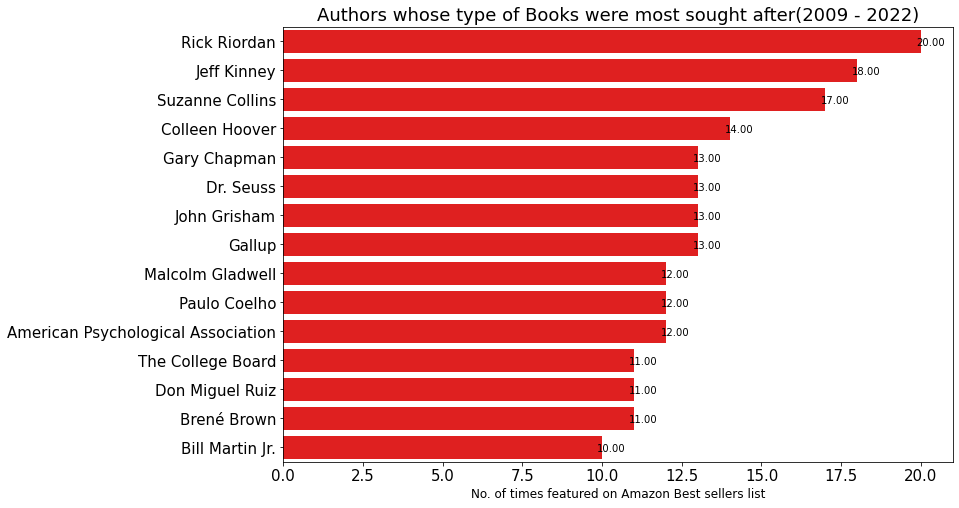

In [52]:
#visulaizing the above findings
bar,ax = plt.subplots(figsize=(12,8))
ax = sb.barplot(x='book_author', y='index', data=authors, ci=None, color='red',orient='h')
ax.set_title('Authors whose type of Books were most sought after(2009 - 2022)', fontsize=18)
ax.set_xlabel ("No. of times featured on Amazon Best sellers list", fontsize=12)
ax.set_ylabel (None, fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

#text annotation
for p in ax.patches:
    width = p.get_width()
    plt.text(0.3+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')

*The chart above has shown authors whose books are most sought after. However, only authors cannot form the basis for which these books are in the best sellers list. we have some books whose cover type were most sought after. The next line operation aims to find these category*

## The type of book cover that are most sought after.

In [41]:
#the most recurring book cover
cover = master['cover_type'].value_counts()
cover = cover.to_frame().reset_index()
cover = cover.head(15)
cover

,index,cover_type
0,Hardcover,610
1,Paperback,517
2,Board book,82
3,Mass Market Paperback,30
4,Cards,4
5,Spiral-bound,1
6,Printed Access Code,1
7,Pamphlet,1


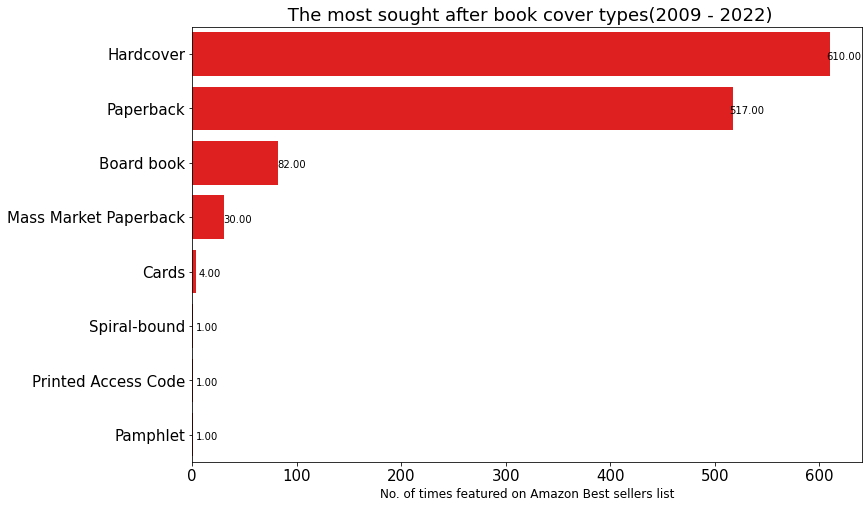

In [51]:
#visulaizing the above findings
bar,ax = plt.subplots(figsize=(12,8))
ax = sb.barplot(x='cover_type', y='index', data=cover, ci=None, color='red',orient='h')
ax.set_title(' The most sought after book cover types(2009 - 2022)', fontsize=18)
ax.set_xlabel ("No. of times featured on Amazon Best sellers list", fontsize=12)
ax.set_ylabel (None, fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

for p in ax.patches:
    width = p.get_width()
    plt.text(13+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')

*It is clear the books with hard cover backs is the most favourable type of book consumers want to buy, closely followed by paperbacks.*

*A look at the most sought after author shows that most of her type of books are hardcover. Take a look at the table below which shows Suzzane collins type of books*

In [43]:
#showing suzanne preffered book cover types for her books
suzan = master[master['book_author'] == 'Suzanne Collins']['cover_type'].value_counts()
suzan = suzan.to_frame().reset_index()
suzan = suzan.head(15)
suzan

,index,cover_type
0,Hardcover,13
1,Paperback,4


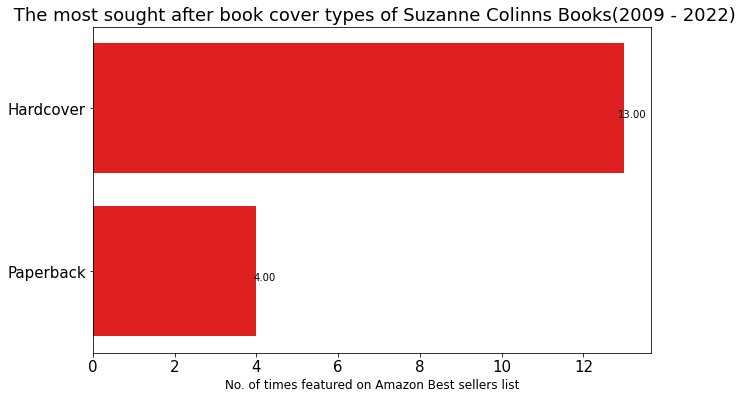

In [50]:
#visulaizing the above findings
plt.figure(figsize=(10,6))
ax = sb.barplot(x='cover_type', y='index', data=suzan, ci=None, color='red',orient='h')
ax.set_title(' The most sought after book cover types of Suzanne Colinns Books(2009 - 2022)', fontsize=18)
ax.set_xlabel ("No. of times featured on Amazon Best sellers list", fontsize=12)
ax.set_ylabel (None, fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

for p in ax.patches:
    width = p.get_width()
    plt.text(0.2+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')

*Suzanne Collins most probably knows that consumers look out for Hardcover books and she is implementing that by making sure most of her books her hardcover.*

*A look at the title of the book and how much they feature on the best sellers list for 2009 - 2022 is done below, all in a bit to understand the most sought after book title by Consumers*

## The most sought after book titles

In [46]:
#the most recurring book cover
title = master['book_title'].value_counts()
title = title.to_frame().reset_index()
title = title.head(15)
title

,index,book_title
0,The Four Agreements: A Practical Guide to Pers...,11
1,StrengthsFinder 2.0,11
2,"Oh, the Places You'll Go!",11
3,Publication Manual of the American Psychologic...,10
4,The Official SAT Study Guide,9
5,What to Expect When You're Expecting,9
6,"Jesus Calling, Padded Hardcover, with Scriptur...",8
7,The Very Hungry Caterpillar,8
8,The 5 Love Languages: The Secret to Love that ...,8
9,Love You Forever,8


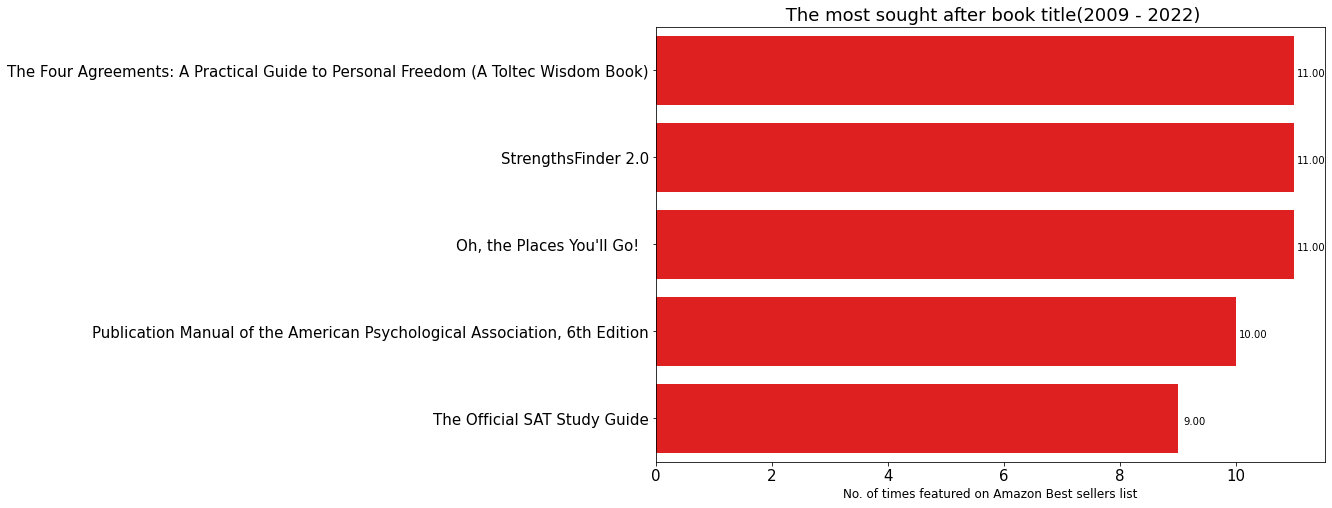

In [49]:
#visulaizing the above findings
bar,ax = plt.subplots(figsize=(12,8))
ax = sb.barplot(x='book_title', y='index', data=title.head(), ci=None, color='red',orient='h')
ax.set_title(' The most sought after book title(2009 - 2022)', fontsize=18)
ax.set_xlabel ("No. of times featured on Amazon Best sellers list", fontsize=12)
ax.set_ylabel (None, fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

for p in ax.patches:
    width = p.get_width()
    plt.text(0.3+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')

*A quick scan of the most recurring title shows that most of the books on this list are **self development books** ."Strenghts Finder2.0" is a great example of this book as it featured on the top selling amazon list multiple times and its author Gallup is one of the most sought after authors.*

In [48]:
#showing Gallup preffered book cover types for her books
master[master['book_title'] == 'StrengthsFinder 2.0']

,rank,book_title,book_author,reviews,rating_over_5,price($),cover_type,Year
5,#6,StrengthsFinder 2.0,Gallup,7122,4.1,18.29,Hardcover,2009
93,#7,StrengthsFinder 2.0,Gallup,7122,4.1,18.29,Hardcover,2010
185,#4,StrengthsFinder 2.0,Gallup,7122,4.1,18.29,Hardcover,2011
273,#5,StrengthsFinder 2.0,Gallup,7122,4.1,18.29,Hardcover,2012
364,#1,StrengthsFinder 2.0,Gallup,7122,4.1,18.29,Hardcover,2013
452,#1,StrengthsFinder 2.0,Gallup,7122,4.1,18.29,Hardcover,2014
548,#5,StrengthsFinder 2.0,Gallup,7122,4.1,18.29,Hardcover,2015
645,#2,StrengthsFinder 2.0,Gallup,7122,4.1,18.29,Hardcover,2016
765,#25,StrengthsFinder 2.0,Gallup,7122,4.1,18.29,Hardcover,2017
885,#78,StrengthsFinder 2.0,Gallup,7122,4.1,18.29,Hardcover,2018


*Strength finder 2.0 found its way to Best selling book on Amazon and its authors featured amongst the most sought after authors of the best selling books on amazon*